# Clean

In [1]:
import os
import shutil

current_folder = os.getcwd()

for item in os.listdir(current_folder):
    item_path = os.path.join(current_folder, item)
    
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.remove(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("All files and folders have been removed!")

All files and folders have been removed!


# Library

In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report

# Load data

In [3]:
input_path = "/kaggle/input/home-data-for-ml-course"

In [4]:
train_df = pd.read_csv(f"{input_path}/train.csv", index_col = "Id")
test_df = pd.read_csv(f"{input_path}/test.csv", index_col = "Id")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [6]:
print(train_df.shape)
train_df[:2]

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Check object types

In [8]:
train_df.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

## Get continuous features

In [9]:
continuous_all = train_df.select_dtypes(exclude = 'object').columns
continuous_all

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
len(continuous_all)

37

## Get categorical features

In [13]:
categorical_all = train_df.select_dtypes(include = 'object').columns
categorical_all

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
len(categorical_all)

43

# Evaluate features

In [15]:
train = train_df
test = test_df

## Continuous

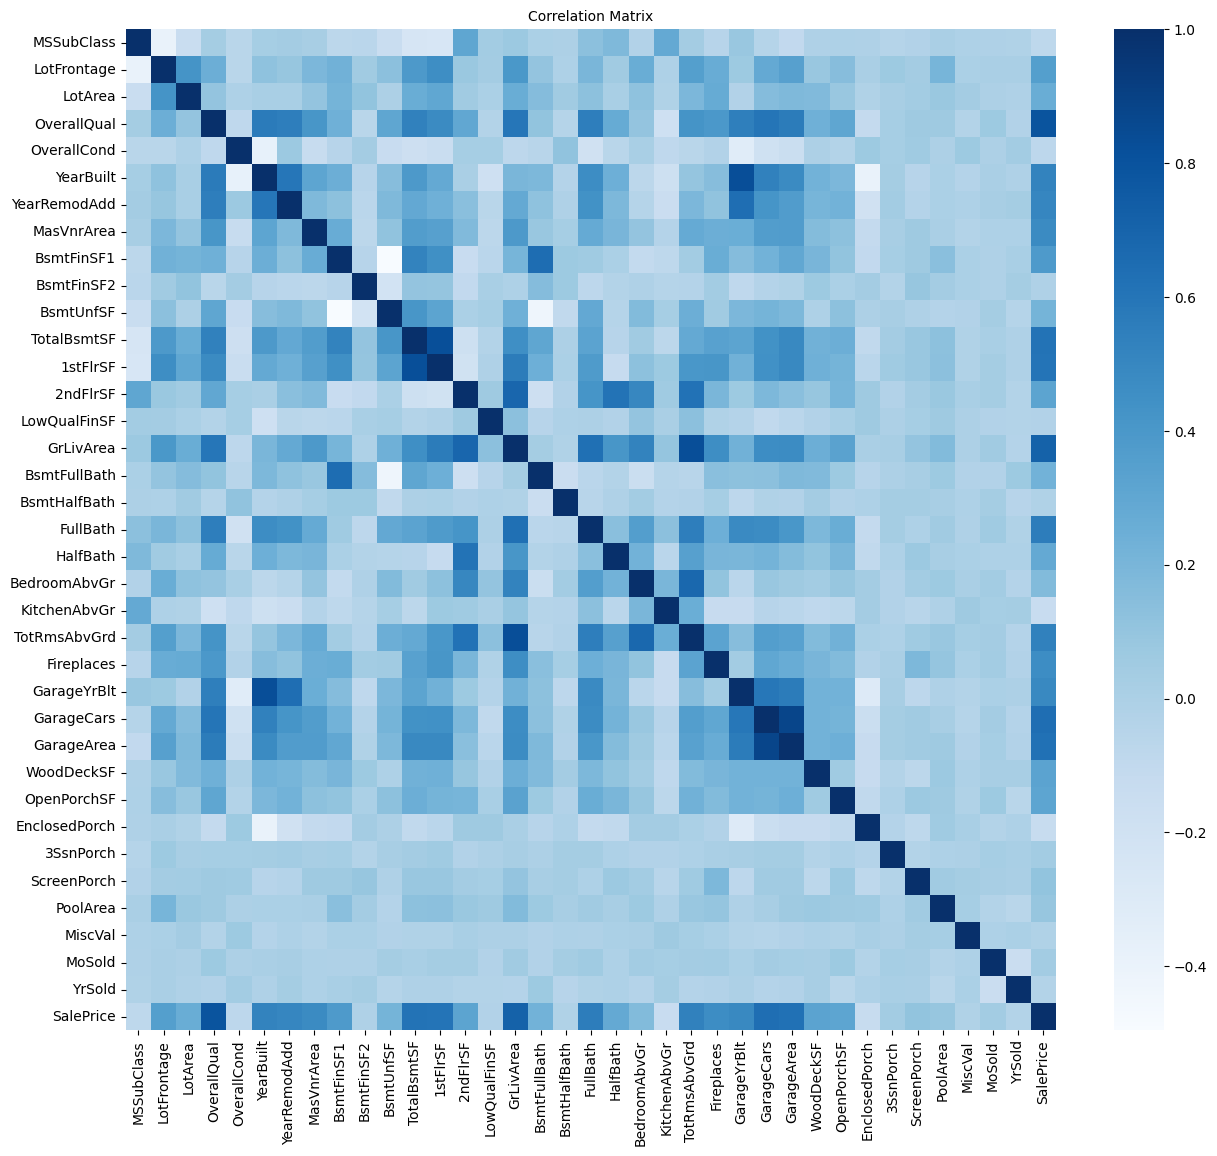

In [16]:
corr_matrix = train[continuous_all].corr()

plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, cmap='Blues')
plt.title("Correlation Matrix", size=10)
plt.show()

In [17]:
corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(20)
corr_matrix['SalePrice'].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

# Preprocessing

## NA

In [18]:
nac = (train_df.isna().sum())
nac = nac[nac > 0]
all_na = dict(zip(nac.index, nac.values))
all_na

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [19]:
train.MasVnrArea = train.MasVnrArea.fillna(0)
test.MasVnrArea = test.MasVnrArea.fillna(0)
category_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in category_fill_none:
    train[cat] = train[cat].fillna("None")
    test[cat] = test[cat].fillna("None")

## Delete outliers

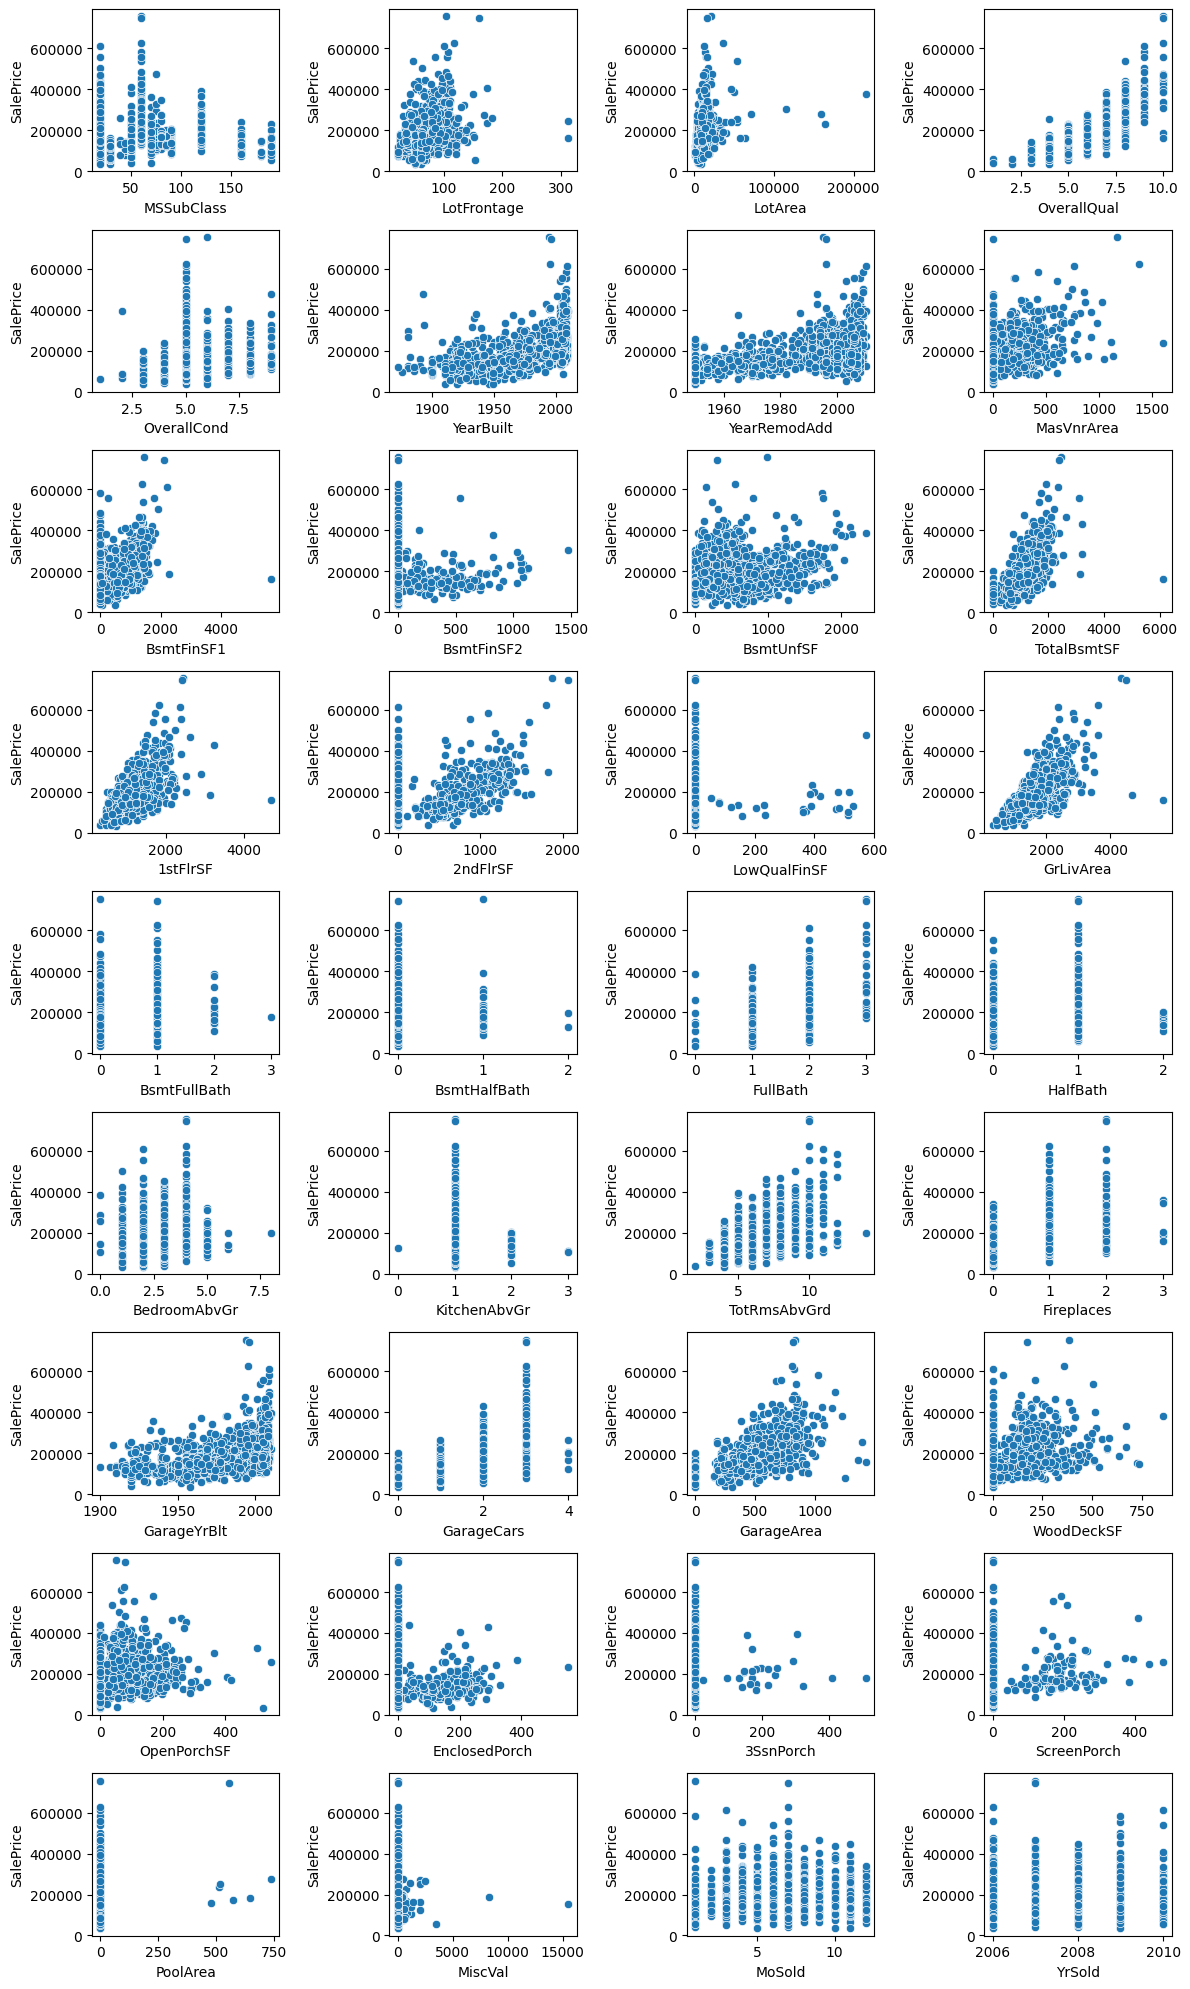

In [20]:
target = train.SalePrice

f = plt.figure(figsize=(12,20))

features = train.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()
for i in range(len(features.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(x=features.iloc[:, i], y=target)
    
plt.tight_layout()
plt.show()

In [21]:
train = train.drop(train.LotFrontage
                                     [train['LotFrontage']>200].index)
train = train.drop(train.LotArea
                                     [train['LotArea']>100000].index)
train = train.drop(train.BsmtFinSF1
                                     [train['BsmtFinSF1']>4000].index)
train = train.drop(train.TotalBsmtSF
                                     [train['TotalBsmtSF']>6000].index)
train = train.drop(train['1stFlrSF']
                                     [train['1stFlrSF']>4000].index)
train = train.drop(train.GrLivArea
                                     [(train['GrLivArea']>4000) & 
                                      (target<300000)].index)
train = train.drop(train.LowQualFinSF
                                     [train['LowQualFinSF']>550].index)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


<ipython-input-22-78ff375bd090>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


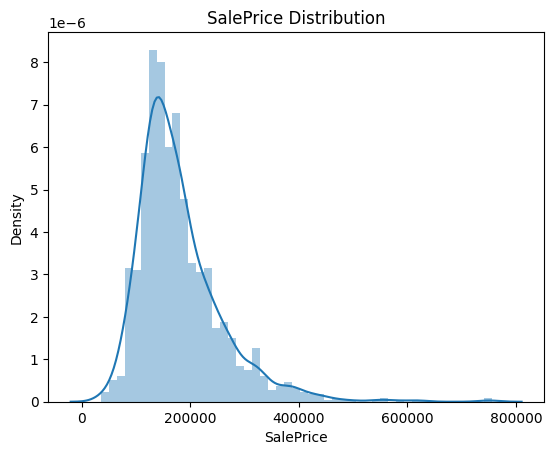

In [22]:
target = train.SalePrice
plt.figure()
sns.distplot(target, color='green')
plt.title('SalePrice Distribution')
plt.show()

In [23]:
# it is shown that SalePrice is skewed so I use log to shift it to the nearly normal distribution form
train['SalePrice']=np.log(train['SalePrice'])

<ipython-input-24-78ff375bd090>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


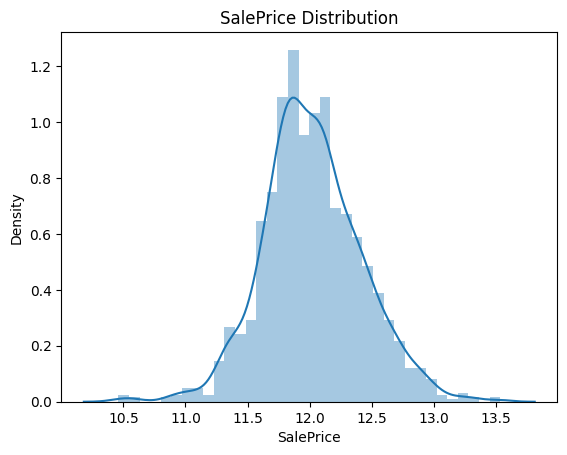

In [24]:
target = train.SalePrice
plt.figure()
sns.distplot(target, color='green')
plt.title('SalePrice Distribution')
plt.show()

In [25]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
col_delete = ['SalePrice', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']

X = train.drop(col_delete, axis=1)
X_test = test.drop([x for x in col_delete if x not in ['SalePrice']], axis=1)

# Create target object and call it y
y = train.SalePrice

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=50)

# Final imputation of missing data - to address those outstanding after previous section
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Make sure the columns in test data is the same as columns in train data
_, X_test = X.align(X_test, join='left', axis=1)
X_test = imputer.transform(X_test)

# Linear Regression model

In [26]:
X_train.shape

(1089, 294)

In [27]:
y_train.shape

(1089,)

In [28]:
# Because saleprice is used with log function so we need to make exponential to it
def inv_y(transformed_y):
    return np.exp(transformed_y)

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iterations=1000, clip_threshold=1.0, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.clip_threshold = clip_threshold  # Gradient clipping threshold
        self.beta1 = beta1  # Exponential decay rate for the first moment estimates
        self.beta2 = beta2  # Exponential decay rate for the second moment estimates
        self.epsilon = epsilon  # Small constant for numerical stability
        self.weights = None
        self.bias = None
        self.m_w = None  # First moment vector for weights
        self.v_w = None  # Second moment vector for weights
        self.m_b = None  # First moment for bias
        self.v_b = None  # Second moment for bias
        self.t = 0  # Time step counter

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        
        # Initialize weights, bias, and Adam variables
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.m_w = np.zeros(n_features)
        self.v_w = np.zeros(n_features)
        self.m_b = 0
        self.v_b = 0

        # Gradient descent with Adam optimizer
        for iteration in range(self.n_iterations):
            # Predictions
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Gradient clipping
            gradient_norm = np.linalg.norm(np.concatenate(([db], dw)))  # Compute the norm of the gradient vector
            if gradient_norm > self.clip_threshold:
                scale = self.clip_threshold / gradient_norm
                dw *= scale
                db *= scale

            # Update time step
            self.t += 1

            # Update biased first moment estimates
            self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
            self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db

            # Update biased second moment estimates
            self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw ** 2)
            self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db ** 2)

            # Compute bias-corrected first moment estimates
            m_w_hat = self.m_w / (1 - self.beta1 ** self.t)
            m_b_hat = self.m_b / (1 - self.beta1 ** self.t)

            # Compute bias-corrected second moment estimates
            v_w_hat = self.v_w / (1 - self.beta2 ** self.t)
            v_b_hat = self.v_b / (1 - self.beta2 ** self.t)

            # Update weights and bias
            self.weights -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
            self.bias -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

            # Debugging: Print loss every 1000 iterations
            if iteration % 10000 == 0:
                mse = np.mean((y_predicted - y) ** 2)
                print(f"Iteration {iteration}: mse = {mse}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [34]:
%%time
model = LinearRegression(learning_rate=0.0000001, n_iterations=150000, clip_threshold=1.0, beta1=0.9, beta2=0.999, epsilon=1e-8)
model.fit(X_train, y_train, X_val, y_val)

Iteration 0: Loss = 144.88656683066927
Iteration 10000: Loss = 3.6837566771399413
Iteration 20000: Loss = 0.47248859224428014
Iteration 30000: Loss = 0.025079298446777247
Iteration 40000: Loss = 0.02345085782034406
Iteration 50000: Loss = 0.02211278931234203
Iteration 60000: Loss = 0.02090731956276579
Iteration 70000: Loss = 0.019829697156679326
Iteration 80000: Loss = 0.01886422890976538
Iteration 90000: Loss = 0.018004933140510805
Iteration 100000: Loss = 0.017239208093180455
Iteration 110000: Loss = 0.016557048464930075
Iteration 120000: Loss = 0.01595170617102856
Iteration 130000: Loss = 0.01541326285343555
Iteration 140000: Loss = 0.014933638839325207
CPU times: user 2min 54s, sys: 789 ms, total: 2min 54s
Wall time: 1min 27s


In [37]:
# Make predictions on the validation set
user_defined_val_predictions = model.predict(X_val)

# Calculate MAE on the validation set
from sklearn.metrics import mean_absolute_error
user_defined_val_mae = mean_absolute_error(inv_y(user_defined_val_predictions), inv_y(y_val))

print(f"User Defined Linear Regression Validation MAE: {user_defined_val_mae}")

User Defined Linear Regression Validation MAE: 15335.146036405367


# Test data

In [38]:
y_pred = model.predict(X_test)
inverted_y_pred = inv_y(y_pred)

output = pd.DataFrame({'Id': test_df.index,
                       'SalePrice': inverted_y_pred})

output.to_csv('submission.csv', index=False)